In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat

In [16]:
#read in CSVs for city and ride sharing data
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [14]:
#city data check
city_data.isna().sum()
#city data contains no null/NA values
#data type check
city_data.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [15]:
#ride data check
ride_data.isna().sum()
#ride data contains no null/NA values
#data type check
ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
#unique values of type column
city_data['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [18]:
#counts of each type of city
city_data["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [22]:
city_ride = pd.merge(city_data,ride_data,how="left",on=["city","city"])
city_ride.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2019-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2019-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2019-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2019-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2019-02-19 14:09:20,27.11,8690324801449


In [99]:
#Separate into city types
urban_cities = city_ride[city_ride["type"] == "Urban"]
suburban_cities = city_ride[city_ride["type"] == "Suburban"]
rural_cities = city_ride[city_ride["type"] == "Rural"]
urban_cities

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
1620,Roberthaven,47,Urban,2019-01-28 10:23:03,21.72,7329967171497
1621,Roberthaven,47,Urban,2019-01-28 22:09:44,28.11,6228196244648
1622,Roberthaven,47,Urban,2019-05-03 05:43:29,42.15,2593369705849
1623,Roberthaven,47,Urban,2019-01-15 21:25:59,30.42,5912507910247


In [105]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
#Get number of rides for suburban cities
suburban_ride_count = suburban_cities.groupby(["city"]).count()['ride_id']
#Get number of rides for rural cities
rural_ride_count = rural_cities.groupby(["city"]).count()['ride_id']

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [54]:
#Get the average of fare for each city type
urban_fare_avg = urban_cities.groupby(['city']).mean()['fare']
suburban_fare_avg = suburban_cities.groupby(['city']).mean()['fare']
rural_fare_avg = rural_cities.groupby(['city']).mean()['fare']

In [57]:
#Get average number of drivers for each city type
urban_driver_avg = urban_cities.groupby(['city']).mean()['driver_count']
suburban_driver_avg = suburban_cities.groupby(['city']).mean()['driver_count']
rural_driver_avg = rural_cities.groupby(['city']).mean()['driver_count']

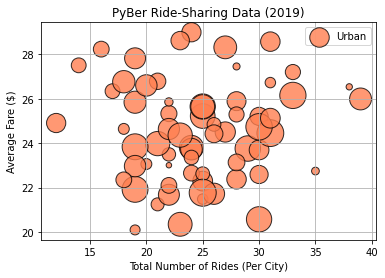

In [62]:
#Create Urban Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_fare_avg,
      s=10*urban_driver_avg, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

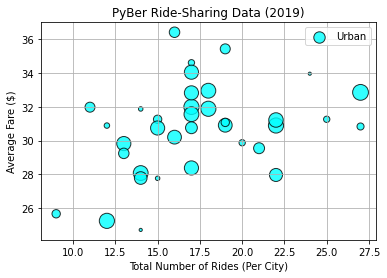

In [63]:
#Create Suburban Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(suburban_ride_count,
      suburban_fare_avg,
      s=10*suburban_driver_avg, c="cyan",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

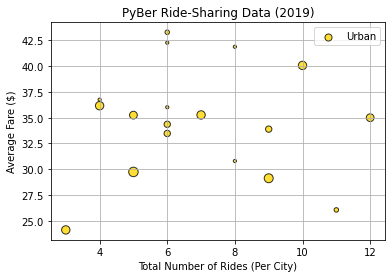

In [65]:
#Create Rural Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count,
      rural_fare_avg,
      s=10*rural_driver_avg, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

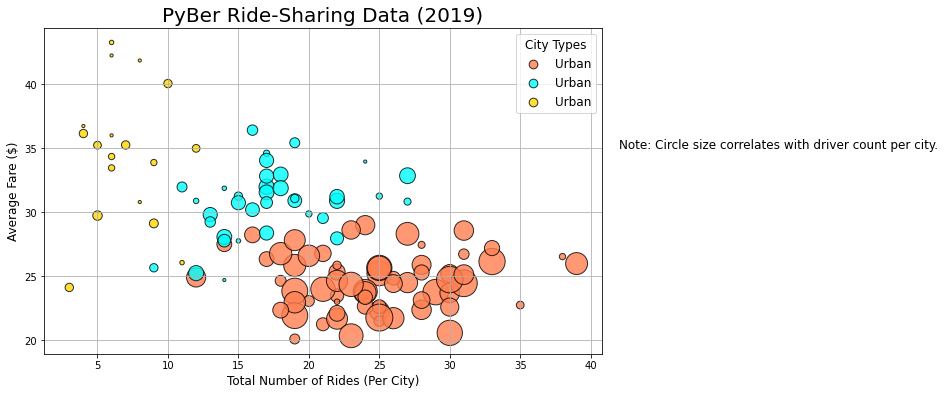

In [74]:
#Create Total Bubble Chart
plt.subplots(figsize=(10, 6))
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_fare_avg,
      s=10*urban_driver_avg, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

#Create Suburban Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(suburban_ride_count,
      suburban_fare_avg,
      s=10*suburban_driver_avg, c="cyan",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

#Create Rural Bubble Chart
# Build the scatter plots for urban cities.
plt.scatter(rural_ride_count,
      rural_fare_avg,
      s=10*rural_driver_avg, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Fig1.png")


In [76]:
#Urban Summary Statistics
urban_cities.describe()

,driver_count,fare,ride_id
count,125.000000,125.000000,1.250000e+02
mean,4.296000,34.623440,4.647746e+12
std,2.691156,14.558046,2.887834e+12
min,1.000000,10.110000,2.684873e+10
25%,1.000000,19.900000,2.275364e+12
50%,4.000000,37.050000,4.023962e+12
75%,7.000000,47.070000,7.118047e+12
max,9.000000,58.550000,9.990581e+12


In [79]:
#Suburban Summary Statistics
suburban_cities.describe()
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [80]:
#Rural Summary Statistics
rural_cities.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [82]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [85]:
urban_ride_count.median()
suburban_ride_count.mode()

0    17
dtype: int64

In [86]:
import numpy as np
import scipy.stats as sts

In [89]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [94]:
urban_fares = urban_cities["fare"]
suburban_fares = suburban_cities["fare"]
rural_fares = rural_cities["fare"]

In [96]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


In [107]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities['driver_count']
suburban_drivers = suburban_cities['driver_count']
rural_drivers = rural_cities['driver_count']
urban_drivers.head()

0    38
1    38
2    38
3    38
4    38
Name: driver_count, dtype: int64

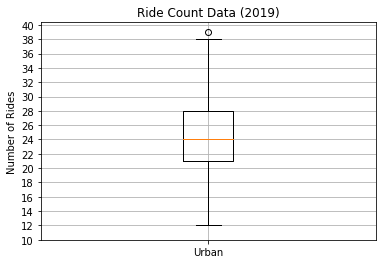

In [108]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

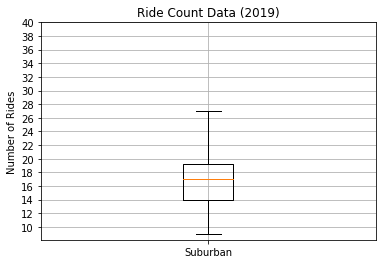

In [109]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

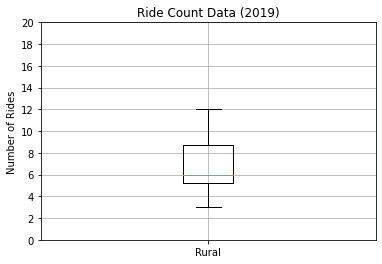

In [112]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 21, step=2.0))
ax.grid()
plt.show()

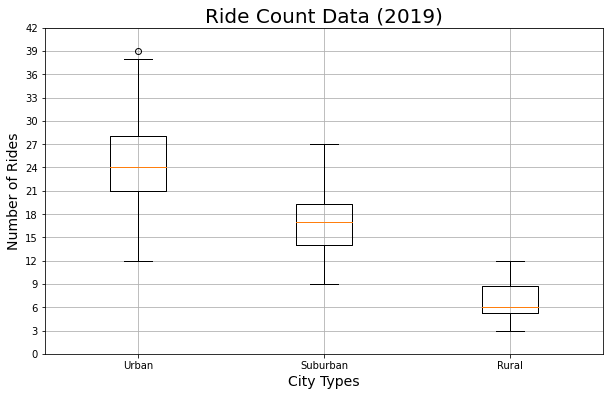

In [113]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Fig2.png")
plt.show()

In [114]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


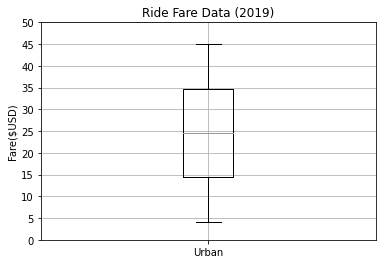

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [115]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

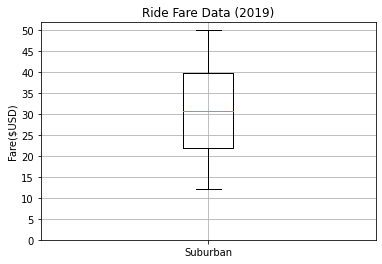

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [116]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

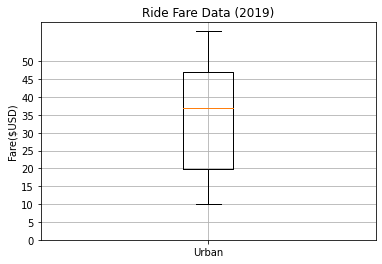

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [117]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

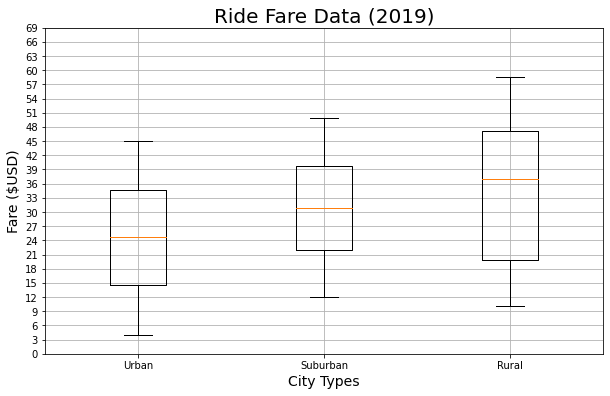

In [119]:
# Add all avg fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
city_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(city_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 70, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Fig3.png")
plt.show()

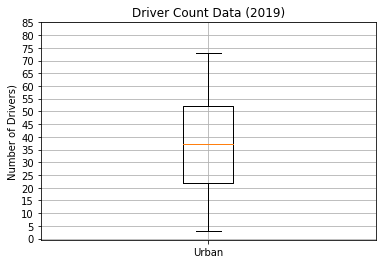

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [120]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

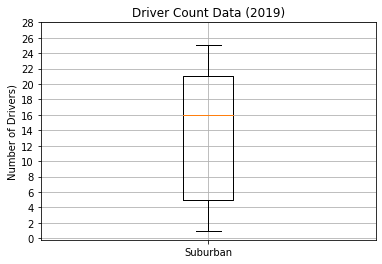

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [130]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

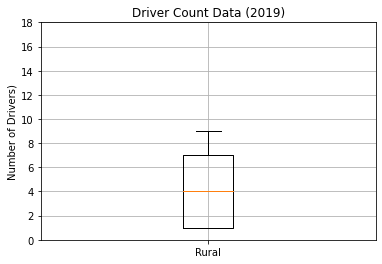

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [129]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 20, step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

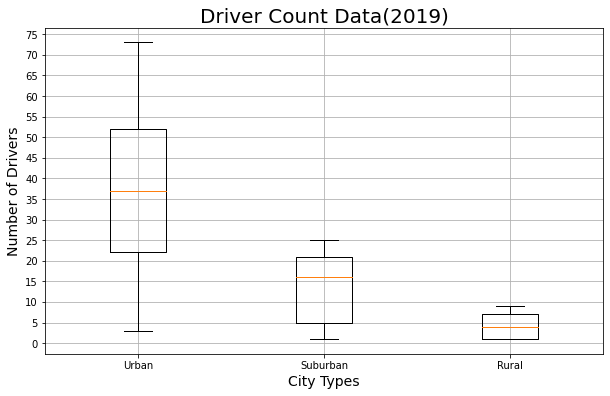

In [132]:
# Add all avg fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
city_fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data(2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(city_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("Fig4.png")
plt.show()

In [134]:
# Get the sum of the fares for each city type.
sum_fares_by_type = city_ride.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [136]:
# Get the sum of all the fares.
total_fares = city_ride["fare"].sum()
total_fares

63538.64

In [137]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * city_ride.groupby(["type"]).sum()["fare"] / city_ride["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

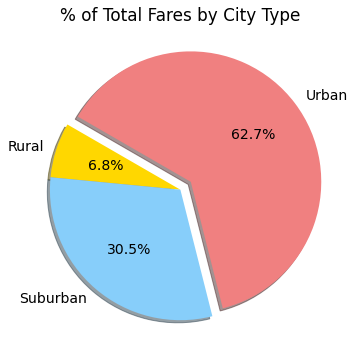

In [141]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Fig5.png")
# Show Figure
plt.show()

In [143]:
# Calculate the percentage of total rides for each city type.
type_ride_percents = 100 * city_ride.groupby(["type"]).count()["ride_id"] / city_ride["ride_id"].count()
type_ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

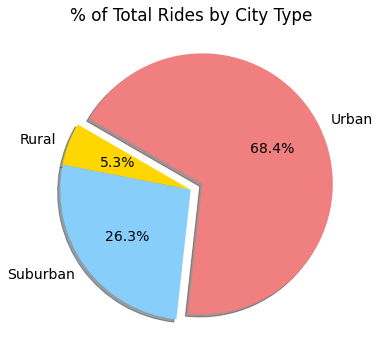

In [149]:
# Build Pie Chart for percentage of total rides for each city type
plt.subplots(figsize=(10, 6))
plt.pie(type_ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Fig6.png")
# Show Figure
plt.show()

In [148]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 *city_data.groupby(["type"]).sum()["driver_count"] /city_data["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

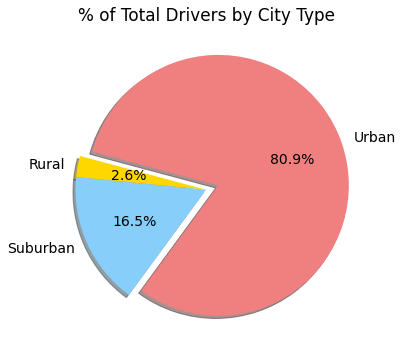

In [151]:
# Build Pie Chart for percentage of tdrivers for each city type
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Fig7.png")
# Show Figure
plt.show()